In [59]:
%matplotlib inline

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
import seaborn as sns

#import sklearn to use linear regression algorithm to build model
from sklearn.linear_model import LinearRegression

#import sklearn to use decision tree regression algorithm to build model
from sklearn.tree import DecisionTreeRegressor

#Import Random Forest
from sklearn.ensemble import RandomForestRegressor

#Import Support Vector Machine
from sklearn import svm

#Import KNN
from sklearn.neighbors import NearestNeighbors, KNeighborsRegressor

#Import ANN
from sklearn.neural_network import MLPRegressor

#Import Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

#import sklearn to split dataset into train/test datasets
from sklearn.model_selection import train_test_split

#import sklearn to perform k-fold cross validation and evaluation of model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

from matplotlib.offsetbox import AnchoredText

import pickle

## Model Type

In [61]:
model_type = 'RF'

model_formula = RandomForestRegressor(n_estimators = 50, random_state = 42, criterion = 'mse', min_samples_split = 10, max_features = 8)
# model_formula = LinearRegression()
# model_formula = KNeighborsRegressor(n_neighbors=4)
# model_formula = GradientBoostingRegressor(loss='huber', learning_rate=0.1, n_estimators=200, min_samples_split=2, alpha=0.9)
# model_formula = MLPRegressor(activation='tanh', solver='adam', alpha=0.0001, learning_rate_init=0.001, max_iter=400)

## Parameters

In [62]:
color='C0'
color_nd='C1'
title_size = 12
label_size = 12
suptitle_size=14
p_size = 0.8
threshold = 0.86
# suptitle_height = 1

## Load & Filter Data

In [63]:
computer = 'sph0088'
training = 'Set 1'
val = 'Set 2'
test = 'Set 3'
test2 = 'Set 4'

file = r'C:\Users\{}\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\test_data\sensor_tceq.csv'.format(computer)
df = pd.read_csv(file)
df = df[df['tceq_pm25']>=0]
df = df[(df['pm2_5_atm_avg'] < df['pm10_0_atm_avg'])] #filter out abnormal values
df = df[(df['pm1_0_atm_avg'] < (df['pm2_5_atm_avg']*2.5))] #filter out abnormal values
df['p03_p05'] = df['p_0_3_um_avg'] / df['p_0_5_um_avg']
df = df[(df['p03_p05'] < 3.75)] #filter out abnormal values


val_file = r'C:\Users\{}\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\test_data\sensor_tceq_new_set2.csv'.format(computer)
df_val = pd.read_csv(val_file)
df_val = df_val[df_val['tceq_pm25']>=0]
df_val = df_val[(df_val['pm2_5_atm_avg'] < df_val['pm10_0_atm_avg'])] #filter out abnormal values
df_val = df_val[(df_val['pm1_0_atm_avg'] < (df_val['pm2_5_atm_avg']*2.5))] #filter out abnormal values
df_val['p03_p05'] = df_val['p_0_3_um_avg'] / df_val['p_0_5_um_avg']
df_val = df_val[(df_val['p03_p05'] < 3.75)] #filter out abnormal values
df_val


test_file = r'C:\Users\{}\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\test_data\sensor_tceq_new_set3.csv'.format(computer)
df_test = pd.read_csv(test_file)
df_test = df_test[df_test['tceq_pm25']>=0]
df_test = df_test[(df_test['pm2_5_atm_avg'] < df_test['pm10_0_atm_avg'])] #filter out abnormal values
df_test = df_test[(df_test['pm1_0_atm_avg'] < (df_test['pm2_5_atm_avg']*2.5))] #filter out abnormal values
df_test['p03_p05'] = df_test['p_0_3_um_avg'] / df_test['p_0_5_um_avg']
df_test = df_test[(df_test['p03_p05'] < 3.75)] #filter out abnormal values
df_test

test2_file = r'C:\Users\{}\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\test_data\sensor_tceq_new_set4.csv'.format(computer)
df_test2 = pd.read_csv(test2_file)
df_test2 = df_test2[df_test2['tceq_pm25']>=0]
df_test2 = df_test2[(df_test2['pm2_5_atm_avg'] < df_test2['pm10_0_atm_avg'])] #filter out abnormal values
df_test2 = df_test2[(df_test2['pm1_0_atm_avg'] < (df_test2['pm2_5_atm_avg']*2.5))] #filter out abnormal values
df_test2['p03_p05'] = df_test2['p_0_3_um_avg'] / df_test2['p_0_5_um_avg']
df_test2 = df_test2[(df_test2['p03_p05'] < 3.75)] #filter out abnormal values
print('Set 1', df.shape)
print('Set 2', df_val.shape)
print('Set 3', df_test.shape)
print('Set 4', df_test2.shape)

Set 1 (2739, 17)
Set 2 (2680, 17)
Set 3 (2670, 17)
Set 4 (2452, 17)


## Single Image

In [64]:
# # %%time
# import warnings
# warnings.filterwarnings("ignore")

# ################################## PA-PM2.5 Treshold ###########################################
# # pm25 = 
# # for p_size in np.arange(start_,end_,increment_):
# # for threshold in np.arange(start,end,increment):
# #################################### Dust Filters #############################################
# df_dust = df[(df['p_10_0_um_avg'] > p_size) | (df['pm25_pm10'] < threshold)]
# df_nodust = df[~((df['p_10_0_um_avg'] > p_size) | (df['pm25_pm10'] < threshold))]

# df_dust_val = df_val[(df_val['p_10_0_um_avg'] > p_size) | (df_val['pm25_pm10'] < threshold)]
# df_nodust_val = df_val[~((df_val['p_10_0_um_avg'] > p_size) | (df_val['pm25_pm10'] < threshold))]

# ################################### Slice Datasets ##########################################################
# #################################### Training Set ##############################################################
# VG7 = df_dust[['current_temp_f', 'current_humidity'
#                ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
#                , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
#                 ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
#                 ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

# Y = df_dust['tceq_pm25']

# VG7_nd = df_nodust[['current_temp_f', 'current_humidity'
#                ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
#                , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
#                 ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
#                 ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

# Y_nd = df_nodust['tceq_pm25']

# #################################### Validation Set ##############################################################
# VG7_val = df_dust_val[['current_temp_f', 'current_humidity'
#                ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
#                , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
#                 ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
#                 ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

# Y_val = df_dust_val['tceq_pm25']

# VG7_nd_val = df_nodust_val[['current_temp_f', 'current_humidity'
#                ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
#                , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
#                 ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
#                 ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

# Y_nd_val = df_nodust_val['tceq_pm25']

# ############################### Train & Save Models #################################################

# trained_model = model_formula.fit(VG7, Y)
# trained_model_nd = model_formula.fit(VG7_nd, Y_nd)

# # Save to file in the current working directory
# pkl_filename = r"C:\Users\{}\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\test_data\trained_model.pkl".format(computer)
# with open(pkl_filename, 'wb') as file:
#     pickle.dump(trained_model, file)

# # Save to file in the current working directory
# pkl_filename_nd = r"C:\Users\{}\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\test_data\trained_model_nd.pkl".format(computer)
# with open(pkl_filename_nd, 'wb') as file:
#     pickle.dump(trained_model_nd, file)

# ############################# Make Figure ###########################################
# fig = plt.figure(figsize=(12,3))
# fig.suptitle('Split-Model Performance; Training: ' + str(training) + '; Validation: ' + str(val), size=suptitle_size, y=suptitle_height)
# ax = fig.add_subplot(132)
# ax2 = fig.add_subplot(133)
# ax3 = fig.add_subplot(131)

# ############################ Make Dust/Non-Dust Scatter ################################
# #Plot 131
# ax3.scatter(df_dust_val['pm2_5_atm_avg'], df_dust_val['tceq_pm25'], label = str(df_dust_val.shape[0])+' dust hours', c=color)
# ax3.scatter(df_nodust_val['pm2_5_atm_avg'], df_nodust_val['tceq_pm25'], label = str(df_nodust_val.shape[0])+' non-dust hours', alpha=0.6, c=color_nd)
# ax3.set_ylabel('BAM PM2.5 (ug x m-3)', size=label_size)
# ax3.set_xlabel('PurpleAir PM2.5 (ug x m-3)', size=label_size)
# ax3.set_title("PA PM2.5 vs BAM BM2.5 Split by Filter", size=title_size)#(str(model_type) + ' Split-Model: VG7')
# ax3.legend(loc=2)    

# ###################################### Dust #############################################
# # Load from file
# with open(pkl_filename, 'rb') as file:
#     pickle_model = pickle.load(file)

# #Metrics
# predicted = cross_val_predict(pickle_model, VG7_val, Y_val)
# squared_error = (predicted - Y_val)**2
# sum_squared_error = sum(squared_error)
# predicted_mean = predicted.mean()
# squared_total = (Y_val - predicted_mean)**2
# sum_squared_total = sum(squared_total)
# sum_squared_total
# n = Y_val.shape[0]
# k = VG7_val.shape[1]

# #Score
# rmse = np.sqrt(sum_squared_error/n)
# RMSE = round(rmse,2)
# Y_mean = Y_val.mean()
# NRMSE = round(RMSE/Y_mean,2)
# r2 = 1 - (sum_squared_error/sum_squared_total)
# R2 = round(r2,2)
# ar2 = 1-(((1-r2)*(n-1))/(n-k-1))
# AR2 = round(ar2,2) 
# MAE = round(sum(abs(predicted - Y_val))/n,2)
# nMAE = round((sum(abs(predicted - Y_val)))/n/Y_mean,2)


# #Plot 132
# ax.scatter(predicted, Y_val, c=color)
# ax.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], 'k--', lw=4)
# ax.set_xlabel('Predicted PM2.5', size=label_size)
# ax.set_ylabel('Actual PM2.5', size=label_size)
# ax.set_title(str(model_type) + ' Dust Model: VG7',size=title_size)
# anchored_text = AnchoredText('MAE: ' + str(MAE) + '\n'
#                              'Adj. R2: ' + str(AR2), loc=2)
# ax.add_artist(anchored_text)
# anchored_text2 = AnchoredText('Filter: P10 > ' + str(round(p_size,2)) + 
#   ' OR ' + '\n' + 'PM2.5:PM10 < '+ str(round(threshold,2)), loc=4)
# ax.add_artist(anchored_text2)

# ##################################### No Dust ####################################
# # Load from file
# with open(pkl_filename_nd, 'rb') as file:
#     pickle_model_nd = pickle.load(file)


# #Metrics
# predicted_nd = cross_val_predict(pickle_model_nd, VG7_nd_val, Y_nd_val)
# squared_error_nd = (predicted_nd - Y_nd_val)**2
# sum_squared_error_nd = sum(squared_error_nd)
# predicted_mean_nd = predicted_nd.mean()
# squared_total_nd = (Y_nd_val - predicted_mean_nd)**2
# sum_squared_total_nd = sum(squared_total_nd)
# n_nd = Y_nd_val.shape[0]
# k_nd = VG7_nd_val.shape[1]

# #Score
# rmse_nd = np.sqrt(sum_squared_error_nd/n_nd)
# RMSE_nd = round(rmse_nd,2)
# Y_mean_nd = Y_nd_val.mean()
# NRMSE_nd = round(RMSE_nd/Y_mean_nd,2)
# r2_nd = 1 - (sum_squared_error_nd/sum_squared_total_nd)
# R2_nd = round(r2_nd,2)
# ar2_nd = 1-(((1-r2_nd)*(n_nd-1))/(n_nd-k_nd-1))
# AR2_nd = round(ar2_nd,2)
# MAE_nd = round(sum(abs(predicted_nd - Y_nd_val))/n_nd,2)
# nMAE_nd = round((sum(abs(predicted_nd - Y_nd_val)))/n_nd/Y_mean_nd,2)


# #Plot 133
# ax2.scatter(predicted_nd, Y_nd_val, c=color_nd)# edgecolors=(0, 0, 0))
# ax2.plot([Y_nd_val.min(), Y_nd_val.max()], [Y_nd_val.min(), Y_nd_val.max()], 'k--', lw=4)
# ax2.set_xlabel('Predicted PM2.5', size=label_size)
# ax2.set_ylabel('Actual PM2.5', size = label_size)
# ax2.set_title(str(model_type) + ' Non-Dust Model: VG7', size=title_size)
# anchored_text = AnchoredText('MAE: ' + str(MAE_nd) + '\n'
#                              'Adj. R2: ' + str(AR2_nd), loc=2)
# ax2.add_artist(anchored_text)
# anchored_text2 = AnchoredText('Filter: P10 <= ' + str(round(p_size,2)) + 
#           ' OR ' + '\n' + 'PM2.5:PM10 >= '+ str(round(threshold,2)), loc=4)
# ax2.add_artist(anchored_text2)

# plt.tight_layout()
# # plt.savefig(r'C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\Thesis_Sheets_Docs\{}_optimal_{}.png'.format(model_type, val), bbox_inches='tight')

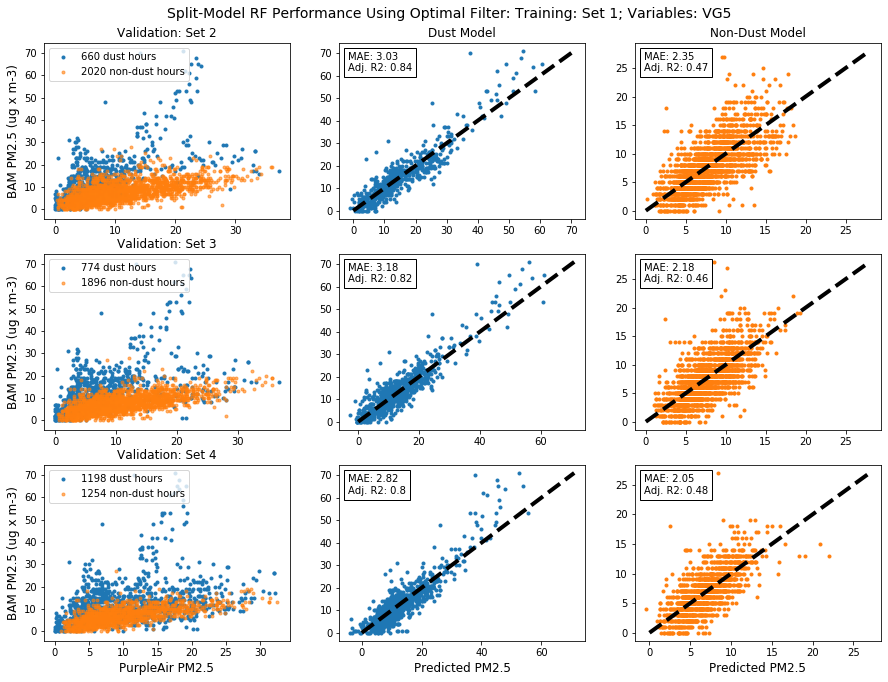

In [65]:
# %%time
import warnings
warnings.filterwarnings("ignore")

################################## PA-PM2.5 Treshold ###########################################
# pm25 = 
# for p_size in np.arange(start_,end_,increment_):
# for threshold in np.arange(start,end,increment):
#################################### Dust Filters #############################################
df_dust = df[(df['p_10_0_um_avg'] > p_size) | (df['pm25_pm10'] < threshold)]
df_nodust = df[~((df['p_10_0_um_avg'] > p_size) | (df['pm25_pm10'] < threshold))]

df_dust_val = df_val[(df_val['p_10_0_um_avg'] > p_size) | (df_val['pm25_pm10'] < threshold)]
df_nodust_val = df_val[~((df_val['p_10_0_um_avg'] > p_size) | (df_val['pm25_pm10'] < threshold))]

df_dust_test = df_test[(df_test['p_10_0_um_avg'] > p_size) | (df_test['pm25_pm10'] < threshold)]
df_nodust_test = df_test[~((df_test['p_10_0_um_avg'] > p_size) | (df_test['pm25_pm10'] < threshold))]

df_dust_test2 = df_test2[(df_test2['p_10_0_um_avg'] > p_size) | (df_test2['pm25_pm10'] < threshold)]
df_nodust_test2 = df_test2[~((df_test2['p_10_0_um_avg'] > p_size) | (df_test2['pm25_pm10'] < threshold))]

################################### Slice Datasets ##########################################################
#################################### Training Set ##############################################################
VG7 = df_dust[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

Y = df_dust['tceq_pm25']

VG7_nd = df_nodust[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

Y_nd = df_nodust['tceq_pm25']

#################################### Validation Sets ##############################################################
VG7_val = df_dust_val[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

Y_val = df_dust_val['tceq_pm25']

VG7_nd_val = df_nodust_val[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

Y_nd_val = df_nodust_val['tceq_pm25']



VG7_test = df_dust_test[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

Y_test = df_dust_test['tceq_pm25']

VG7_nd_test = df_nodust_test[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

Y_nd_test = df_nodust_test['tceq_pm25']


VG7_test2 = df_dust_test2[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

Y_test2 = df_dust_test2['tceq_pm25']

VG7_nd_test2 = df_nodust_test2[['current_temp_f', 'current_humidity'
               ,'p_0_3_um_avg', 'p_0_5_um_avg', 'p_1_0_um_avg'
               , 'p_2_5_um_avg','p_5_0_um_avg', 'p_10_0_um_avg'
                ,'pm2_5_atm_avg','pm1_0_atm_avg', 'pm10_0_atm_avg'
                ,'pm1_pm25', 'pm25_pm10', 'pm1_pm10']]

Y_nd_test2 = df_nodust_test2['tceq_pm25']


############################### Train & Save Models #################################################

trained_model = model_formula.fit(VG7, Y)
trained_model_nd = model_formula.fit(VG7_nd, Y_nd)

# Save to file in the current working directory
pkl_filename = r"C:\Users\{}\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\test_data\trained_model.pkl".format(computer)
with open(pkl_filename, 'wb') as file:
    pickle.dump(trained_model, file)

# Save to file in the current working directory
pkl_filename_nd = r"C:\Users\{}\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\test_data\trained_model_nd.pkl".format(computer)
with open(pkl_filename_nd, 'wb') as file:
    pickle.dump(trained_model_nd, file)

############################# Make Figure ###########################################
fig = plt.figure(figsize=(15,11))
fig.suptitle('Split-Model ' + str(model_type) + ' Performance Using Optimal Filter: Training: ' + str(training) + '; Variables: VG5', size=suptitle_size, y=0.925)
# ax = fig.add_subplot(131)
# ax2 = fig.add_subplot(132)
# ax3 = fig.add_subplot(133)
# ax4 = fig.add_subplot(231)
# ax5 = fig.add_subplot(232)
# ax6 = fig.add_subplot(233)

ax = plt.subplot(331)
ax2 = plt.subplot(332)
ax3 = plt.subplot(333)
ax4 = plt.subplot(334)
ax5 = plt.subplot(335)
ax6 = plt.subplot(336)
ax7 = plt.subplot(337)
ax8 = plt.subplot(338)
ax9 = plt.subplot(339)

##################################################################################################################################################################################################
############################ Make Dust/Non-Dust Scatter ################################
#Plot 131
ax.scatter(df_dust_val['pm2_5_atm_avg'], df_dust_val['tceq_pm25'], label = str(df_dust_val.shape[0])+' dust hours', c=color, marker=".")
ax.scatter(df_nodust_val['pm2_5_atm_avg'], df_nodust_val['tceq_pm25'], label = str(df_nodust_val.shape[0])+' non-dust hours', alpha=0.6, c=color_nd, marker=".")
ax.set_ylabel('BAM PM2.5 (ug x m-3)', size=label_size)
# ax.set_xlabel('PurpleAir PM2.5 (ug x m-3)', size=label_size)
ax.set_title("Validation: Set 2", size=title_size)#(str(model_type) + ' Split-Model: VG7')
ax.legend(loc=2)    

###################################### Dust #############################################
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

#Metrics
predicted = cross_val_predict(pickle_model, VG7_val, Y_val)
squared_error = (predicted - Y_val)**2
sum_squared_error = sum(squared_error)
predicted_mean = predicted.mean()
squared_total = (Y_val - predicted_mean)**2
sum_squared_total = sum(squared_total)
sum_squared_total
n = Y_val.shape[0]
k = VG7_val.shape[1]

#Score
rmse = np.sqrt(sum_squared_error/n)
RMSE = round(rmse,2)
Y_mean = Y_val.mean()
NRMSE = round(RMSE/Y_mean,2)
r2 = 1 - (sum_squared_error/sum_squared_total)
R2 = round(r2,2)
ar2 = 1-(((1-r2)*(n-1))/(n-k-1))
AR2 = round(ar2,2) 
MAE = round(sum(abs(predicted - Y_val))/n,2)
nMAE = round((sum(abs(predicted - Y_val)))/n/Y_mean,2)


#Plot 132
ax2.scatter(predicted, Y_val, c=color, marker=".")
ax2.plot([Y_val.min(), Y_val.max()], [Y_val.min(), Y_val.max()], 'k--', lw=4)
# ax2.set_xlabel('Predicted PM2.5', size=label_size)
# ax2.set_ylabel('Actual PM2.5', size=label_size)
ax2.set_title('Dust Model',size=title_size)
anchored_text = AnchoredText('MAE: ' + str(MAE) + '\n'
                             'Adj. R2: ' + str(AR2), loc=2)
ax2.add_artist(anchored_text)
# anchored_text2 = AnchoredText('Filter: P10 > ' + str(round(p_size,2)) + 
#   ' OR ' + '\n' + 'PM2.5:PM10 < '+ str(round(threshold,2)), loc=4)
# ax2.add_artist(anchored_text2)

##################################### No Dust ####################################
# Load from file
with open(pkl_filename_nd, 'rb') as file:
    pickle_model_nd = pickle.load(file)


#Metrics
predicted_nd = cross_val_predict(pickle_model_nd, VG7_nd_val, Y_nd_val)
squared_error_nd = (predicted_nd - Y_nd_val)**2
sum_squared_error_nd = sum(squared_error_nd)
predicted_mean_nd = predicted_nd.mean()
squared_total_nd = (Y_nd_val - predicted_mean_nd)**2
sum_squared_total_nd = sum(squared_total_nd)
n_nd = Y_nd_val.shape[0]
k_nd = VG7_nd_val.shape[1]

#Score
rmse_nd = np.sqrt(sum_squared_error_nd/n_nd)
RMSE_nd = round(rmse_nd,2)
Y_mean_nd = Y_nd_val.mean()
NRMSE_nd = round(RMSE_nd/Y_mean_nd,2)
r2_nd = 1 - (sum_squared_error_nd/sum_squared_total_nd)
R2_nd = round(r2_nd,2)
ar2_nd = 1-(((1-r2_nd)*(n_nd-1))/(n_nd-k_nd-1))
AR2_nd = round(ar2_nd,2)
MAE_nd = round(sum(abs(predicted_nd - Y_nd_val))/n_nd,2)
nMAE_nd = round((sum(abs(predicted_nd - Y_nd_val)))/n_nd/Y_mean_nd,2)


#Plot 133
ax3.scatter(predicted_nd, Y_nd_val, c=color_nd, marker=".")# edgecolors=(0, 0, 0))
ax3.plot([Y_nd_val.min(), Y_nd_val.max()], [Y_nd_val.min(), Y_nd_val.max()], 'k--', lw=4)
# ax3.set_xlabel('Predicted PM2.5', size=label_size)
# ax3.set_ylabel('Actual PM2.5', size = label_size)
ax3.set_title('Non-Dust Model', size=title_size)
anchored_text = AnchoredText('MAE: ' + str(MAE_nd) + '\n'
                             'Adj. R2: ' + str(AR2_nd), loc=2)
ax3.add_artist(anchored_text)
# anchored_text2 = AnchoredText('Filter: P10 <= ' + str(round(p_size,2)) + 
#           ' OR ' + '\n' + 'PM2.5:PM10 >= '+ str(round(threshold,2)), loc=4)
# ax3.add_artist(anchored_text2)

# plt.tight_layout()
# plt.show()


##################################################################################################################################################################################################
############################ Make Dust/Non-Dust Scatter ################################
#Plot 131
ax4.scatter(df_dust_test['pm2_5_atm_avg'], df_dust_test['tceq_pm25'], label = str(df_dust_test.shape[0])+' dust hours', c=color, marker=".")
ax4.scatter(df_nodust_test['pm2_5_atm_avg'], df_nodust_test['tceq_pm25'], label = str(df_nodust_test.shape[0])+' non-dust hours', alpha=0.6, c=color_nd, marker=".")
ax4.set_ylabel('BAM PM2.5 (ug x m-3)', size=label_size)
# ax4.set_xlabel('PurpleAir PM2.5 (ug x m-3)', size=label_size)
ax4.set_title("Validation: Set 3", size=title_size)#(str(model_type) + ' Split-Model: VG7')
ax4.legend(loc=2)    

###################################### Dust #############################################
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

#Metrics
predicted = cross_val_predict(pickle_model, VG7_test, Y_test)
squared_error = (predicted - Y_test)**2
sum_squared_error = sum(squared_error)
predicted_mean = predicted.mean()
squared_total = (Y_test - predicted_mean)**2
sum_squared_total = sum(squared_total)
sum_squared_total
n = Y_test.shape[0]
k = VG7_test.shape[1]

#Score
rmse = np.sqrt(sum_squared_error/n)
RMSE = round(rmse,2)
Y_mean = Y_test.mean()
NRMSE = round(RMSE/Y_mean,2)
r2 = 1 - (sum_squared_error/sum_squared_total)
R2 = round(r2,2)
ar2 = 1-(((1-r2)*(n-1))/(n-k-1))
AR2 = round(ar2,2) 
MAE = round(sum(abs(predicted - Y_test))/n,2)
nMAE = round((sum(abs(predicted - Y_test)))/n/Y_mean,2)


#Plot 132
ax5.scatter(predicted, Y_test, c=color, marker=".")
ax5.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4)
# ax5.set_xlabel('Predicted PM2.5', size=label_size)
# ax5.set_ylabel('Actual PM2.5', size=label_size)
# ax5.set_title(str(model_type) + ' Dust Model: VG7',size=title_size)
anchored_text = AnchoredText('MAE: ' + str(MAE) + '\n'
                             'Adj. R2: ' + str(AR2), loc=2)
ax5.add_artist(anchored_text)
# anchored_text2 = AnchoredText('Filter: P10 > ' + str(round(p_size,2)) + 
#   ' OR ' + '\n' + 'PM2.5:PM10 < '+ str(round(threshold,2)), loc=4)
# ax5.add_artist(anchored_text2)

##################################### No Dust ####################################
# Load from file
with open(pkl_filename_nd, 'rb') as file:
    pickle_model_nd = pickle.load(file)


#Metrics
predicted_nd = cross_val_predict(pickle_model_nd, VG7_nd_test, Y_nd_test)
squared_error_nd = (predicted_nd - Y_nd_test)**2
sum_squared_error_nd = sum(squared_error_nd)
predicted_mean_nd = predicted_nd.mean()
squared_total_nd = (Y_nd_test - predicted_mean_nd)**2
sum_squared_total_nd = sum(squared_total_nd)
n_nd = Y_nd_test.shape[0]
k_nd = VG7_nd_test.shape[1]

#Score
rmse_nd = np.sqrt(sum_squared_error_nd/n_nd)
RMSE_nd = round(rmse_nd,2)
Y_mean_nd = Y_nd_test.mean()
NRMSE_nd = round(RMSE_nd/Y_mean_nd,2)
r2_nd = 1 - (sum_squared_error_nd/sum_squared_total_nd)
R2_nd = round(r2_nd,2)
ar2_nd = 1-(((1-r2_nd)*(n_nd-1))/(n_nd-k_nd-1))
AR2_nd = round(ar2_nd,2)
MAE_nd = round(sum(abs(predicted_nd - Y_nd_test))/n_nd,2)
nMAE_nd = round((sum(abs(predicted_nd - Y_nd_test)))/n_nd/Y_mean_nd,2)


#Plot 133
ax6.scatter(predicted_nd, Y_nd_test, c=color_nd, marker=".")# edgecolors=(0, 0, 0))
ax6.plot([Y_nd_test.min(), Y_nd_test.max()], [Y_nd_test.min(), Y_nd_test.max()], 'k--', lw=4)
# ax6.set_xlabel('Predicted PM2.5', size=label_size)
# ax6.set_ylabel('Actual PM2.5', size = label_size)
# ax6.set_title(str(model_type) + ' Non-Dust Model: VG7', size=title_size)
anchored_text = AnchoredText('MAE: ' + str(MAE_nd) + '\n'
                             'Adj. R2: ' + str(AR2_nd), loc=2)
ax6.add_artist(anchored_text)
# anchored_text2 = AnchoredText('Filter: P10 <= ' + str(round(p_size,2)) + 
#           ' OR ' + '\n' + 'PM2.5:PM10 >= '+ str(round(threshold,2)), loc=4)
# ax6.add_artist(anchored_text2)

# plt.tight_layout()
# plt.show()
##################################################################################################################################################################################################
############################ Make Dust/Non-Dust Scatter ################################
#Plot 131
ax7.scatter(df_dust_test2['pm2_5_atm_avg'], df_dust_test2['tceq_pm25'], label = str(df_dust_test2.shape[0])+' dust hours', c=color, marker=".")
ax7.scatter(df_nodust_test2['pm2_5_atm_avg'], df_nodust_test2['tceq_pm25'], label = str(df_nodust_test2.shape[0])+' non-dust hours', alpha=0.6, c=color_nd, marker=".")
ax7.set_ylabel('BAM PM2.5 (ug x m-3)', size=label_size)
ax7.set_xlabel('PurpleAir PM2.5', size=label_size)
ax7.set_title("Validation: Set 4", size=title_size)#(str(model_type) + ' Split-Model: VG7')
ax7.legend(loc=2)    

###################################### Dust #############################################
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

#Metrics
predicted = cross_val_predict(pickle_model, VG7_test2, Y_test2)
squared_error = (predicted - Y_test2)**2
sum_squared_error = sum(squared_error)
predicted_mean = predicted.mean()
squared_total = (Y_test2 - predicted_mean)**2
sum_squared_total = sum(squared_total)
sum_squared_total
n = Y_test2.shape[0]
k = VG7_test2.shape[1]

#Score
rmse = np.sqrt(sum_squared_error/n)
RMSE = round(rmse,2)
Y_mean = Y_test2.mean()
NRMSE = round(RMSE/Y_mean,2)
r2 = 1 - (sum_squared_error/sum_squared_total)
R2 = round(r2,2)
ar2 = 1-(((1-r2)*(n-1))/(n-k-1))
AR2 = round(ar2,2) 
MAE = round(sum(abs(predicted - Y_test2))/n,2)
nMAE = round((sum(abs(predicted - Y_test2)))/n/Y_mean,2)


#Plot 132
ax8.scatter(predicted, Y_test2, c=color, marker=".")
ax8.plot([Y_test2.min(), Y_test2.max()], [Y_test2.min(), Y_test2.max()], 'k--', lw=4)
ax8.set_xlabel('Predicted PM2.5', size=label_size)
# ax8.set_ylabel('Actual PM2.5', size=label_size)
# ax5.set_title(str(model_type) + ' Dust Model: VG7',size=title_size)
anchored_text = AnchoredText('MAE: ' + str(MAE) + '\n'
                             'Adj. R2: ' + str(AR2), loc=2)
ax8.add_artist(anchored_text)
# anchored_text2 = AnchoredText('Filter: P10 > ' + str(round(p_size,2)) + 
#   ' OR ' + '\n' + 'PM2.5:PM10 < '+ str(round(threshold,2)), loc=4)
# ax8.add_artist(anchored_text2)

##################################### No Dust ####################################
# Load from file
with open(pkl_filename_nd, 'rb') as file:
    pickle_model_nd = pickle.load(file)


#Metrics
predicted_nd = cross_val_predict(pickle_model_nd, VG7_nd_test2, Y_nd_test2)
squared_error_nd = (predicted_nd - Y_nd_test2)**2
sum_squared_error_nd = sum(squared_error_nd)
predicted_mean_nd = predicted_nd.mean()
squared_total_nd = (Y_nd_test2 - predicted_mean_nd)**2
sum_squared_total_nd = sum(squared_total_nd)
n_nd = Y_nd_test2.shape[0]
k_nd = VG7_nd_test2.shape[1]

#Score
rmse_nd = np.sqrt(sum_squared_error_nd/n_nd)
RMSE_nd = round(rmse_nd,2)
Y_mean_nd = Y_nd_test2.mean()
NRMSE_nd = round(RMSE_nd/Y_mean_nd,2)
r2_nd = 1 - (sum_squared_error_nd/sum_squared_total_nd)
R2_nd = round(r2_nd,2)
ar2_nd = 1-(((1-r2_nd)*(n_nd-1))/(n_nd-k_nd-1))
AR2_nd = round(ar2_nd,2)
MAE_nd = round(sum(abs(predicted_nd - Y_nd_test2))/n_nd,2)
nMAE_nd = round((sum(abs(predicted_nd - Y_nd_test2)))/n_nd/Y_mean_nd,2)


#Plot 133
ax9.scatter(predicted_nd, Y_nd_test2, c=color_nd, marker=".")# edgecolors=(0, 0, 0))
ax9.plot([Y_nd_test2.min(), Y_nd_test2.max()], [Y_nd_test2.min(), Y_nd_test2.max()], 'k--', lw=4)
ax9.set_xlabel('Predicted PM2.5', size=label_size)
# ax9.set_ylabel('Actual PM2.5', size = label_size)
# ax6.set_title(str(model_type) + ' Non-Dust Model: VG7', size=title_size)
anchored_text = AnchoredText('MAE: ' + str(MAE_nd) + '\n'
                             'Adj. R2: ' + str(AR2_nd), loc=2)
ax9.add_artist(anchored_text)
# anchored_text2 = AnchoredText('Filter: P10 <= ' + str(round(p_size,2)) + 
#           ' OR ' + '\n' + 'PM2.5:PM10 >= '+ str(round(threshold,2)), loc=4)
# ax9.add_artist(anchored_text2)

# plt.savefig(r'C:\Users\sph0088\OneDrive - UNT System\AQ\Calibration_Sensors\Collocation_Data\Thesis_Sheets_Docs\{}_optimal.png'.format(model_type), bbox_inches='tight')

In [66]:
print(Y_nd_val.mean())
print(Y_nd_test.mean())
print(Y_nd_test2.mean())

7.874257425742575
7.59915611814346
7.047846889952153
